In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import the Required Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
HR_Attrition=pd.read_csv("drive/MyDrive/Colab Notebooks/Stats and ML datasets/HR_Employee_Attrition_Data.csv")

## Data Pre-Processing

In [4]:
HR_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [5]:
HR_Attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
HR_Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

* Insight: 

There are total of 35 columns out of which 26 are of numeric type & 9 are of categorical type

In [7]:
HR_Attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
HR_Attrition.shape

(2940, 35)

In [9]:
## drop duplicate rows if any

HR_Attrition.drop_duplicates(inplace=True)
HR_Attrition.shape

(2940, 35)

In [10]:
## Null Value check
HR_Attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

* Insight:
As we can see that there are no null values are present, no need to treat null values seperately

In [11]:
## Check for univariate columns
HR_Attrition["Over18"].unique()

array(['Y'], dtype=object)

In [12]:
HR_Attrition["EmployeeCount"].unique()

array([1])

* Insights:
1. Over18 column contain only one value which is "Y" so we can drop this column as variance is 0 in that column
2. Employee Count column having only "1" unique value, so this column is also having 0 variance, so we can remove that column

In [13]:
## Dropping zero variance columns
HR_Attrition.drop(["Over18",'EmployeeCount'],axis=1,inplace=True)

# Exploratory Data Analysis

In [14]:
## Distribution of target class

HR_Attrition.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

* Insight: There is class imbalance in this dataset, so we can ask for more no of samples to get robust results

In [15]:
##Identify no of numeric columns
numeric = ['int64','float64']
Numeric_data=HR_Attrition.select_dtypes(include=numeric)
Numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   DailyRate                 2940 non-null   int64
 2   DistanceFromHome          2940 non-null   int64
 3   Education                 2940 non-null   int64
 4   EmployeeNumber            2940 non-null   int64
 5   EnvironmentSatisfaction   2940 non-null   int64
 6   HourlyRate                2940 non-null   int64
 7   JobInvolvement            2940 non-null   int64
 8   JobLevel                  2940 non-null   int64
 9   JobSatisfaction           2940 non-null   int64
 10  MonthlyIncome             2940 non-null   int64
 11  MonthlyRate               2940 non-null   int64
 12  NumCompaniesWorked        2940 non-null   int64
 13  PercentSalaryHike         2940 non-null   int64
 14  PerformanceRating         2940 non-null 

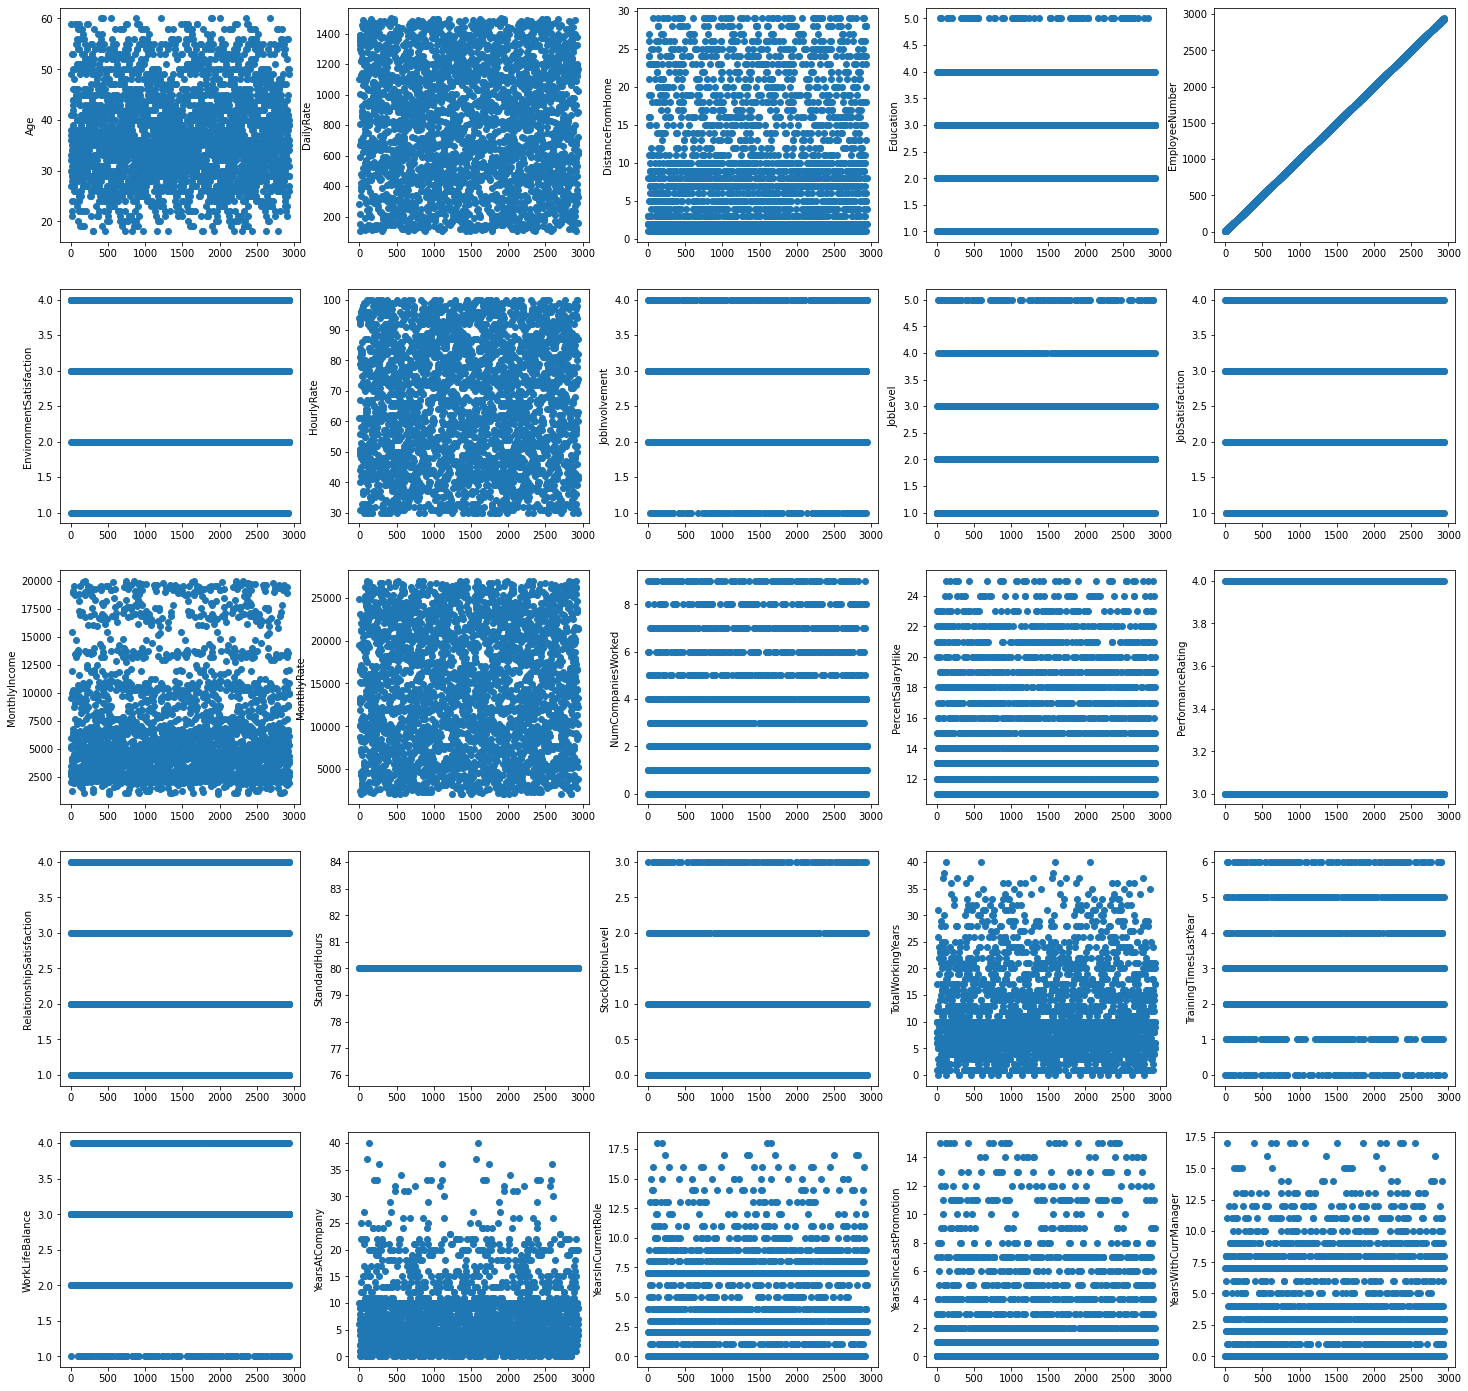

In [16]:
#### Visualizing numeric columns ######

numeric_cols = HR_Attrition.select_dtypes(include = np.number) ### selects numeric columns
#numeric_cols = numeric_cols.loc[numeric_cols['Balance Transfer']<=2500, :]

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 5
plot_cols = 5

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (25,25))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1
        

* Insights: 
1. Employee number varies linearly with Index number, it is not much contributing to the attrition, so it can be removed.
2. There are almost negligible outliers, so no special treatment for outlier is required

In [17]:
HR_Attrition.drop("EmployeeNumber",axis=1,inplace=True)

In [18]:
HR_Attrition.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

In [19]:
## Visualizing Categorical data

cat_data = HR_Attrition.select_dtypes(include = np.object) ##subsets the object columns

column_names = list(cat_data.columns) ### column names of the object columns

for column in column_names:
    print('Column ', column)
    print('Number of unique elements ', cat_data[column].nunique())
    print('***************\n')

Column  Attrition
Number of unique elements  2
***************

Column  BusinessTravel
Number of unique elements  3
***************

Column  Department
Number of unique elements  3
***************

Column  EducationField
Number of unique elements  6
***************

Column  Gender
Number of unique elements  2
***************

Column  JobRole
Number of unique elements  9
***************

Column  MaritalStatus
Number of unique elements  3
***************

Column  OverTime
Number of unique elements  2
***************



<ipython-input-19-62317b06c963>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_data = HR_Attrition.select_dtypes(include = np.object) ##subsets the object columns


In [20]:
## Checking Corelated features
corrmat=round(HR_Attrition.corr(),2)
print(corrmat)
print(corrmat.shape)

                           Age  DailyRate  DistanceFromHome  Education  \
Age                       1.00       0.01             -0.00       0.21   
DailyRate                 0.01       1.00             -0.00      -0.02   
DistanceFromHome         -0.00      -0.00              1.00       0.02   
Education                 0.21      -0.02              0.02       1.00   
EnvironmentSatisfaction   0.01       0.02             -0.02      -0.03   
HourlyRate                0.02       0.02              0.03       0.02   
JobInvolvement            0.03       0.05              0.01       0.04   
JobLevel                  0.51       0.00              0.01       0.10   
JobSatisfaction          -0.00       0.03             -0.00      -0.01   
MonthlyIncome             0.50       0.01             -0.02       0.09   
MonthlyRate               0.03      -0.03              0.03      -0.03   
NumCompaniesWorked        0.30       0.04             -0.03       0.13   
PercentSalaryHike         0.00       0

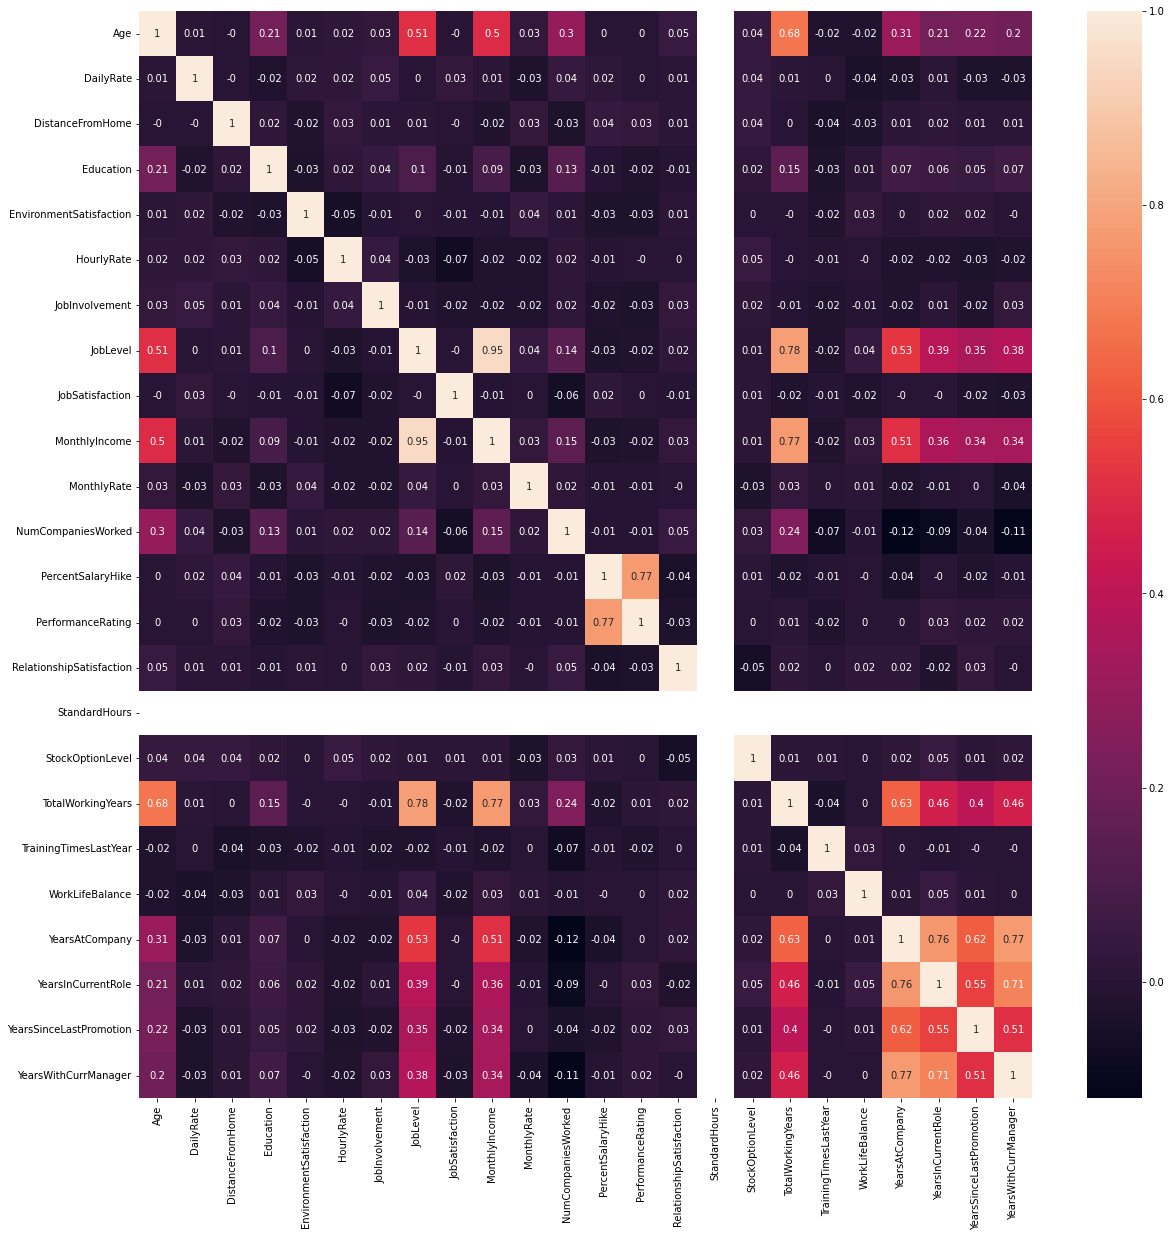

In [21]:
## Plotting Corelation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True)
plt.show()


## Insight about Corelation check
1. Performance Rating and Percentage Salary Hike-77%
2. Total Working Years & Job Level-78%
3. Total Working Years & Monthly Income-77%
4. Years At Company & Years with Curr Manager-77%
5. Years in Current Role & Years at Company-76%

* Apart from this other variables dont show much corelation

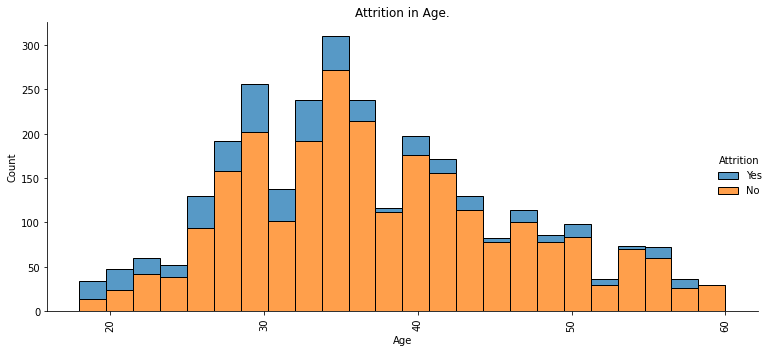

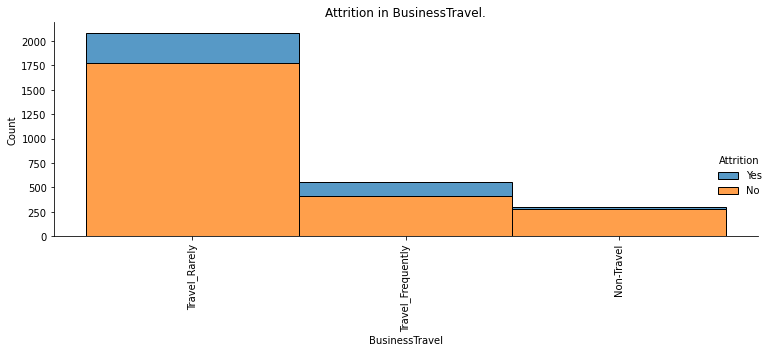

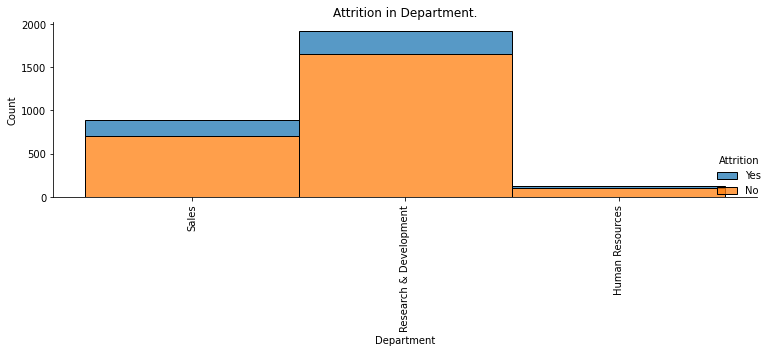

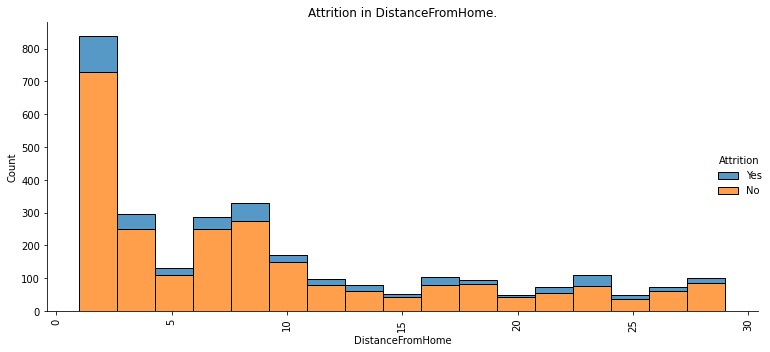

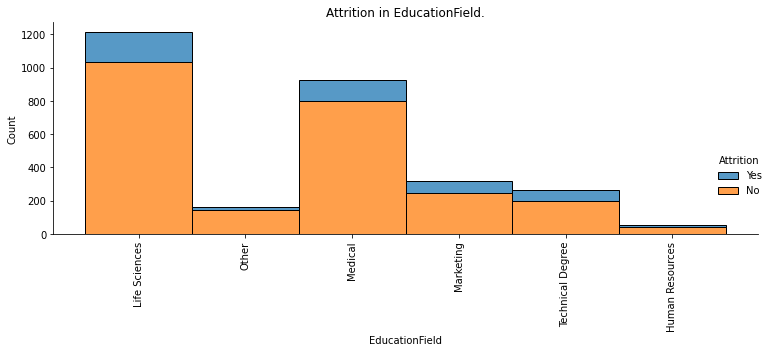

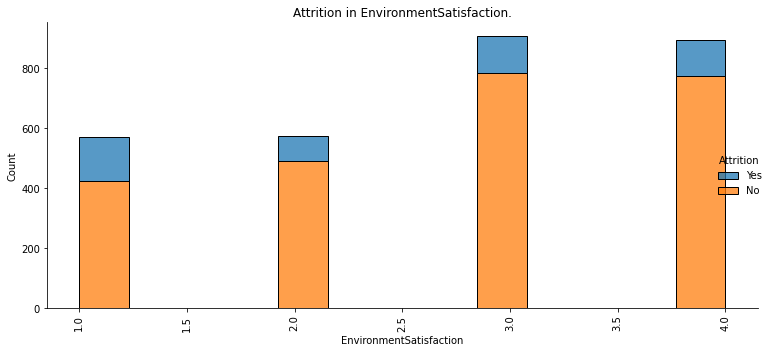

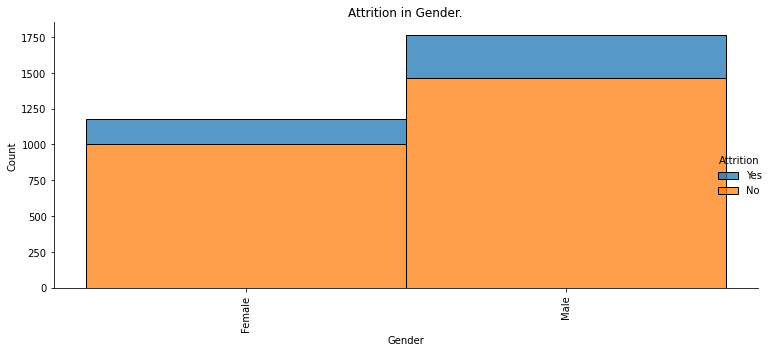

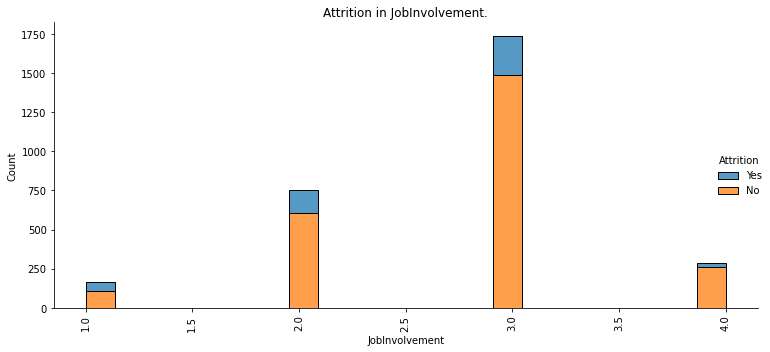

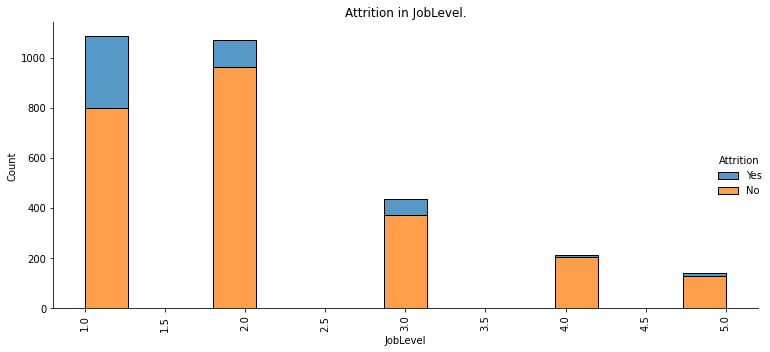

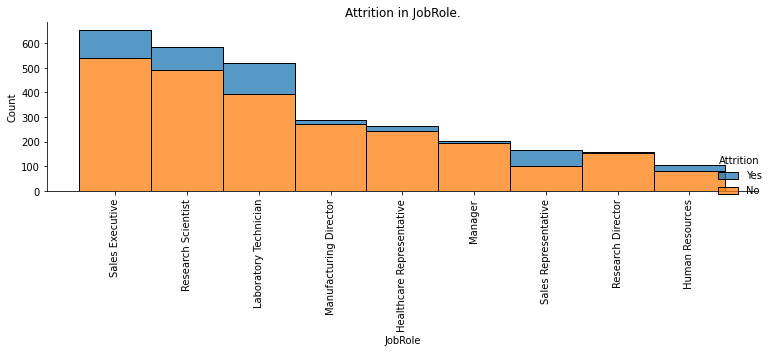

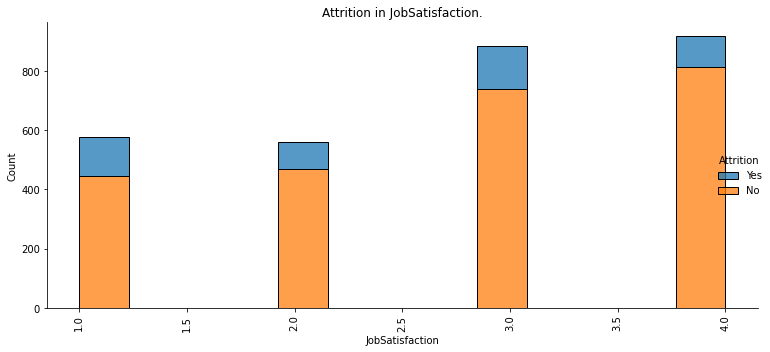

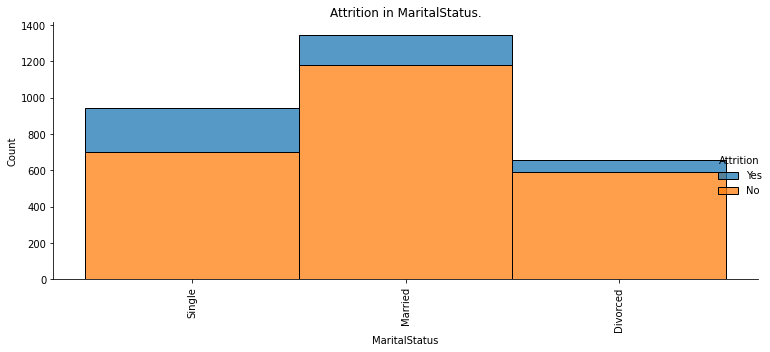

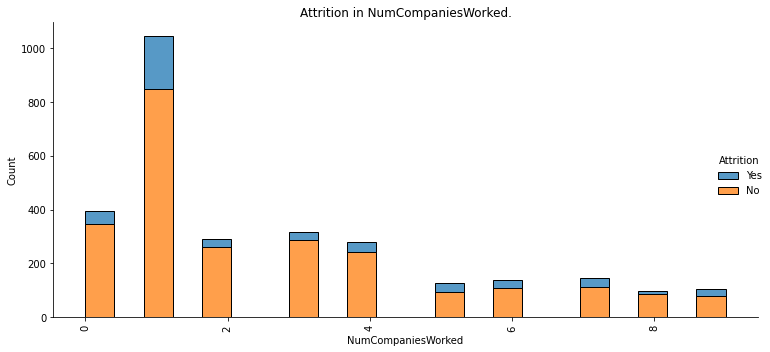

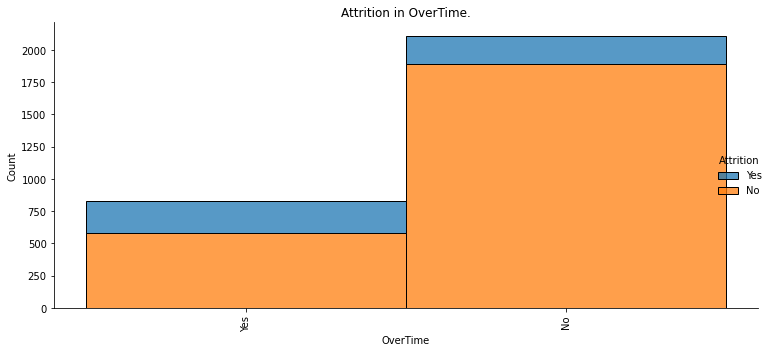

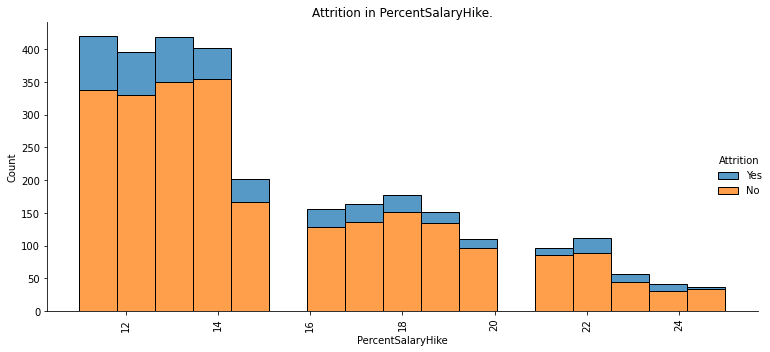

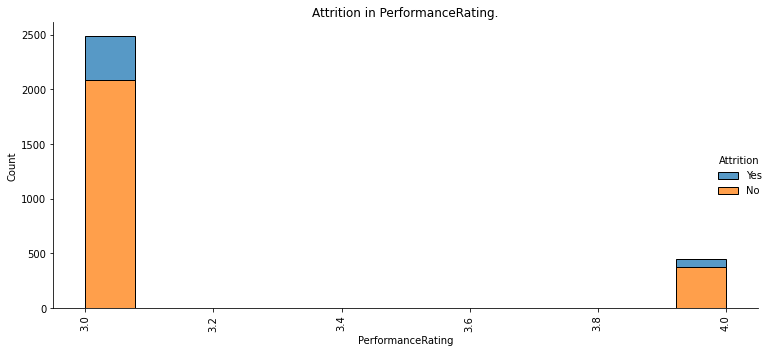

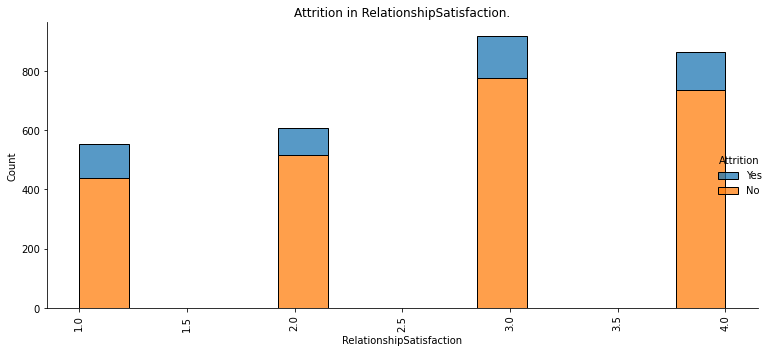

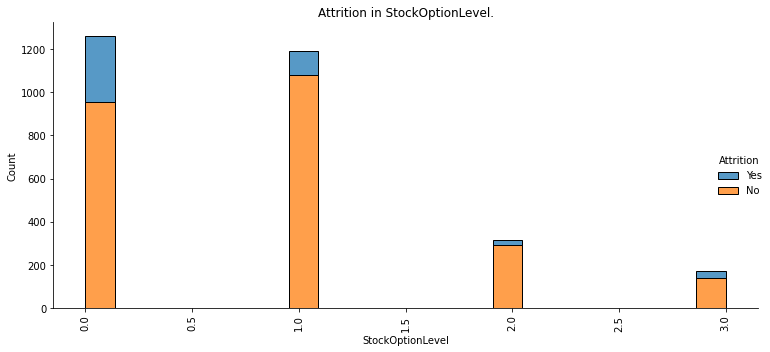

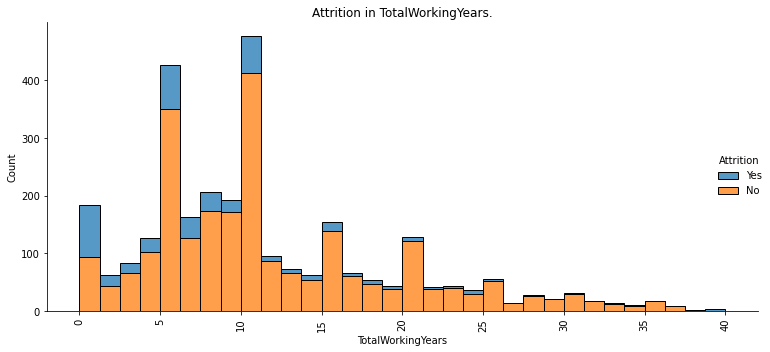

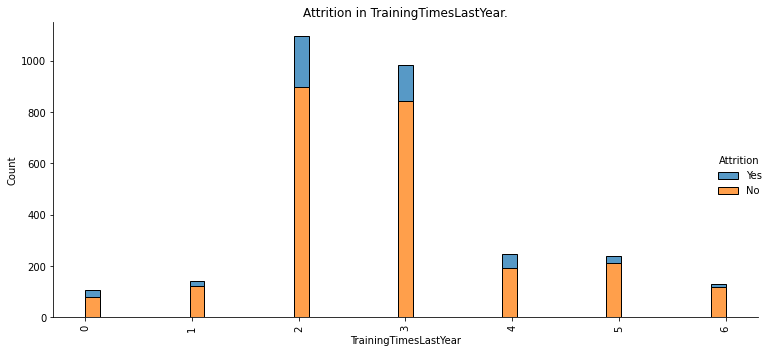

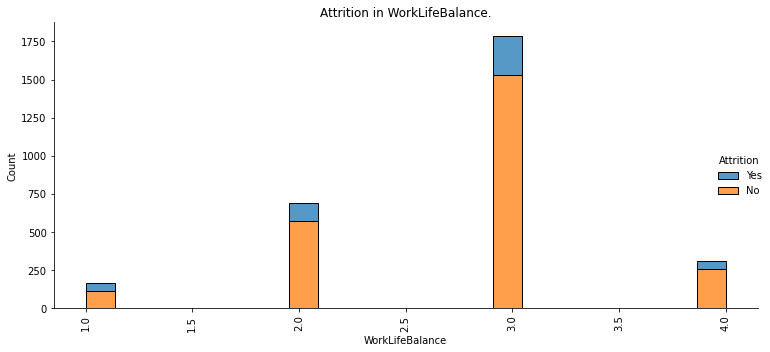

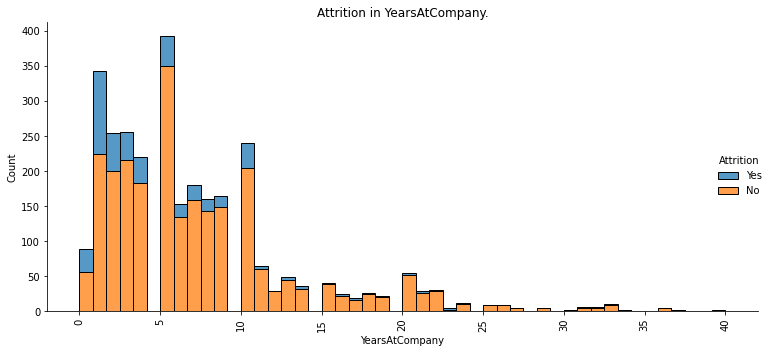

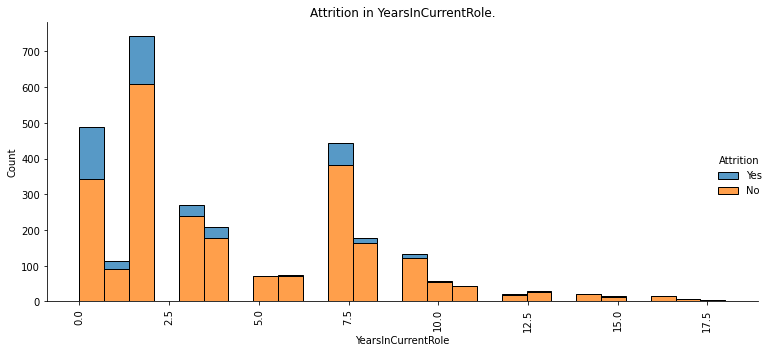

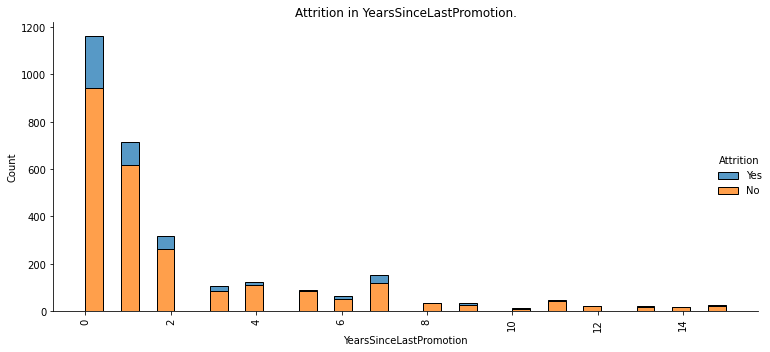

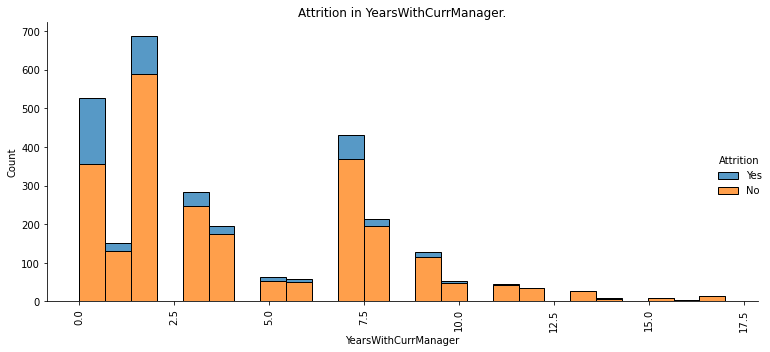

In [22]:
attrition_by_features = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome','EducationField',
                         'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole','JobSatisfaction',
                        'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
                        'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                         'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                         'YearsWithCurrManager']

for a in range(len(attrition_by_features)):
    sns.displot(x = attrition_by_features[a], hue = 'Attrition', data=HR_Attrition, multiple='stack', height = 5, aspect = 2)
    plt.xticks(rotation=90)
    plt.title(f'Attrition in {attrition_by_features[a]}.')
    plt.tight_layout()
    plt.show()


* Observations
1. Attribution decreases as age increases.
2. High Travel Frequency seems to equate to a higher proportion of Attrition
Department-wise attrition seems to be similar.
3. Distance from home, Educational Field, Gender, Job Involvemnet, Percent Salary Hike, Performance Rating, Relationship Satisfaction, Training Times Last Year, Work Life Balance, Years since Last promotion do not seem to have a significant impact on Attrition.
4. Attrition is highest amongst employees with low Environment Satisfaction.
5. Attrition is highest in low job levels.
6. Attrition is high in employees with Low job satisfaction. Strangely, it is also high in employees with high-medium Job Satisfaction.
7. Attrition is highest in Single employees.
8. Attrition is highest in persons who have worked in 1 company.
9. Attrition is higher in employees who have workd overtime.
10. Lower stock option level to employees shows higher atttirtion.
11. Employees who have worked 1-2 years or less, have high Attrition
Attrition keeps reducing (significantly between years 5 to 6) as the number of Years at company for the employee keeps increasing.
12. As Years in Current Role increases, Attrition decreases.
13. First year with current manager seems to be a make or break time. Attrition is high during this period.

## Data Preprocessing for Model Building

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_curve, auc, confusion_matrix

In [ ]:
Dummy_DF=HR_Attrition


In [ ]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])

    return res_df
    

In [ ]:
encoded_df=preprocessor(Dummy_DF)


In [ ]:
## Split the data into x & y
x = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


## Build the Decision Tree Model

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,6,8,10,12,14,16,18],
              'min_samples_leaf':[10,20,30,40],
              'max_features':['auto','sqrt'],
              'criterion': ['gini','entropy']
              }

# cv_rf = GridSearchCV(fit_rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = 3)

tree_class = DecisionTreeClassifier(random_state=42,class_weight={0:0.4, 1:0.6})

CV_Decision_Tree=GridSearchCV(tree_class,param_grid=param_dist, n_jobs = 1)
CV_Decision_Tree.fit(x_train,y_train)
print('Best Parameters using grid search: \n', CV_Decision_Tree.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 10}
Time taken in grid search:  7.89


In [ ]:
tree_class.set_params(criterion='gini',max_depth=4,max_features='auto',min_samples_leaf=10)

DecisionTreeClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=4,
                       max_features='auto', min_samples_leaf=10,
                       random_state=42)

In [ ]:
CV_Decision_Tree_score_train = CV_Decision_Tree.score(x_train, y_train)
print("Training score: ",CV_Decision_Tree_score_train)
CV_Decision_Tree_score_test = CV_Decision_Tree.score(x_test, y_test)
print("Testing score: ",CV_Decision_Tree_score_test)


Training score:  0.8562925170068028
Testing score:  0.8503401360544217


* As we are getting less difference between training score & testing score, so we can assume this will be good model


In [ ]:
tree_class.set_params(criterion='gini',max_depth=14,max_features='auto')

DecisionTreeClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=14,
                       max_features='auto', min_samples_leaf=10,
                       random_state=42)

In [ ]:
CV_Decision_Tree_score_train = CV_Decision_Tree.score(x_train, y_train)
print("Training score: ",CV_Decision_Tree_score_train)
CV_Decision_Tree_score_test = CV_Decision_Tree.score(x_test, y_test)
print("Testing score: ",CV_Decision_Tree_score_test)

Training score:  0.8562925170068028
Testing score:  0.8503401360544217


In [ ]:
# model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
# model_dt.fit(x_train, y_train)
# y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

In [ ]:
y_pred_dt = CV_Decision_Tree.predict_proba(x_test)[:, 1]

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [ ]:
predictions = CV_Decision_Tree.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

## Performance Metrics

## Area Under Curve

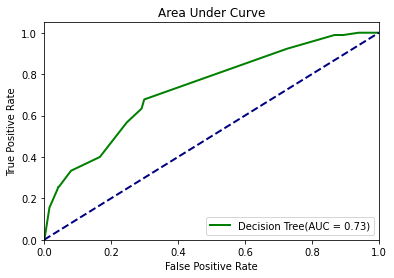

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [ ]:
print (confusion_matrix(y_test, predictions))

[[477  21]
 [ 67  23]]


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

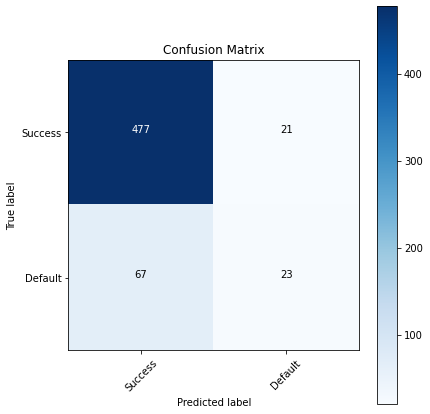

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

* There are only 91 misclassifications are there out of 588

## Model Building using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
rf=RandomForestClassifier(random_state=42,n_estimators=200)


In [ ]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              }

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  338.19


In [ ]:
rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(n_estimators=400, random_state=42)

## Model Training

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [ ]:
predictions_rf = rf.predict(x_test)

## Confusion Matrix


In [ ]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosst_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosst = test_crosst_comp.values
        return test_crosst

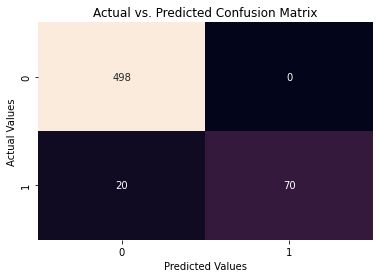

In [ ]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Classification Report

In [ ]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test))

In [ ]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       518
           1       0.78      1.00      0.88        70

    accuracy                           0.97       588
   macro avg       0.89      0.98      0.93       588
weighted avg       0.97      0.97      0.97       588

